In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [20]:
def fourier_series(t, p=365.25, n=10):
    """
    :pram t: times
    :pram p: seasonality period. p=365.25 for yearly, p=7 for weekly seaonality
    :param n: number of terms in the fourrier serie
    """
    x = 2 * np.pi * np.arange(1, n + 1) / p
    x = x * t[:, None]
    x = np.concatenate((np.cos(x), np.sin(x)), axis=1)
    return x

In [53]:
ts = np.arange(1, 260, 1)

In [54]:
a = -0.05
b = 100
N = 10
seasonality_params = [1.0, 2.0, 3.0, 4.0, 5.0, -5.0, -4.0, -3.0, -2.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, -5.0, -4.0, -3.0, -2.0, -1.0]

In [55]:
def f(t):
    linear = a * t + b
    seasonality = fourier_series(t, 52, N) @ seasonality_params
    return linear + seasonality + np.random.rand(len(t)) * 10 - 5

In [56]:
ys = f(ts)

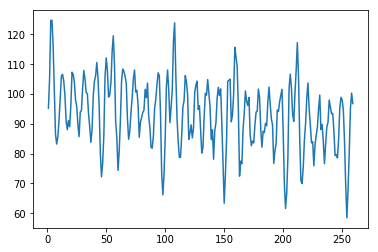

In [57]:
plt.plot(ts, ys)
plt.show()

In [58]:
data = {
    't': ts,
    'y': ys
}
df = pd.DataFrame(data)
df.head()

,t,y
0,1,95.264989
1,2,105.255171
2,3,124.721654
3,4,124.752148
4,5,116.125884


In [59]:
df.to_csv("./sample_data.csv", index=False)